In [1]:
#input file voice.csv in /input/ directory inside project folder
#running this command to list 
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

voice.csv



In [2]:
#importing reqired libraries
import pandas as p
import numpy as n
import seaborn as s

from sklearn.preprocessing import LabelEncoder #encoding
from sklearn.preprocessing import StandardScaler #standardisation
from sklearn.model_selection import train_test_split #train/test split
from sklearn.model_selection import cross_val_score #K-fold cross  validation

#SVM libraries
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.model_selection import GridSearchCV #to find best parameter

import matplotlib.pyplot as m
%matplotlib inline

In [3]:
#reading csv file into dataframe
dataframe = p.read_csv('input/voice.csv')
dataframe.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
#correalation
dataframe.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [5]:
dataframe.shape
#Features = 21, Instances = 3168

(3168, 21)

In [6]:
print("Male samples = {}".format(dataframe[dataframe.label == 'male'].shape[0]))
print("Female samples = {}".format(dataframe[dataframe.label == 'female'].shape[0]))
#There are equal number of samples

Male samples = 1584
Female samples = 1584


In [7]:
#Encoding features
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]

encode = LabelEncoder()
y = encode.fit_transform(y)
y
#male = 1
#female = 0

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
#Standardization of datasets is a common requirement for many machine learning estimators implemented 
#in scikit-learn; they might behave badly if the individual features do not more or less look like 
#standard normally distributed data.
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

In [9]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
#Default hyperparameters
svc = SVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print('Accuracy of default hyperparameters :')
print(metrics.accuracy_score(y_test, y_predict))

Accuracy of default hyperparameters :
0.9763406940063092


In [11]:
#Default linear kernal
svc=SVC(kernel='linear')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print('Accuracy of deafult linear kernal :')
print(metrics.accuracy_score(y_test, y_predict))

Accuracy of deafult linear kernal :
0.9779179810725552


In [12]:
#Default RBF Kernel
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print('Accuracy of deafult RBF kernal:')
print(metrics.accuracy_score(y_test, y_predict))

Accuracy of deafult RBF kernal:
0.9763406940063092


In [13]:
#Default Polynomial Kernel
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print('Accuracy of deafult polynomial kernal:')
print(metrics.accuracy_score(y_test, y_predict))

Accuracy of deafult polynomial kernal:
0.9589905362776026


In [14]:
#K-fold cross validation is a procedure used to estimate the skill of the model on new data.
#Its a resampling procedure used to evaluate machine learning models on a limited data sample.

In [15]:
#Cross Validation on Linear Kernal
svc = SVC(kernel = 'linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9696991175178692


In [16]:
#Cross Validation on RBF Kernal
svc = SVC(kernel = 'rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9665325639899376


In [17]:
#Cross Validation on Polynomial Kernal
svc = SVC(kernel = 'poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9450654873617378


In [18]:
#Checking accuracy of kenal as linear with values of C
C_range = list(range(1,26))
acc = []
for c in C_range:
    svc = SVC(kernel = 'linear', C = c)
    scores = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
    acc.append(scores.mean())
print(acc) 

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

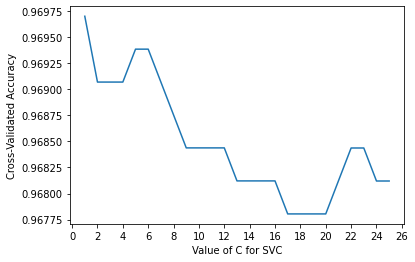

In [19]:
C_values = list(range(1,26))

m.plot(C_values,acc)
m.xticks(n.arange(0,27,2))
m.xlabel('Value of C for SVC')
m.ylabel('Cross-Validated Accuracy')

In [20]:
C_range = list(n.arange(0.1,6,0.1))
acc = []
for c in C_range:
    svc = SVC(kernel = 'linear', C = c)
    scores = cross_val_score(svc, X, y, cv = 10, scoring='accuracy')
    acc.append(scores.mean())
print(acc)  

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

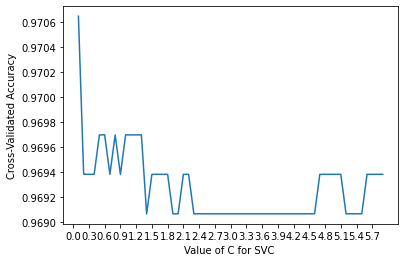

In [21]:
C_values=list(n.arange(0.1,6,0.1))

m.plot(C_values,acc)
m.xticks(n.arange(0.0,6,0.3))
m.xlabel('Value of C for SVC ')
m.ylabel('Cross-Validated Accuracy')

In [ ]:
#C gives highest accuracy at C = 0.1

In [22]:
#Taking polynomial kernel with different degree
degree = [2,3,4,5,6]
acc = []
for d in degree: 
    svc = SVC(kernel = 'poly', degree = d)
    scores = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
    acc.append(scores.mean())
print(acc)   

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


Text(0, 0.5, 'Cross-Validated Accuracy')

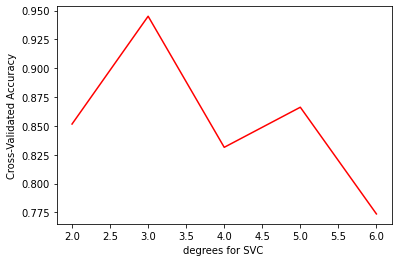

In [23]:
degree=[2,3,4,5,6]

m.plot(degree,acc,color='r')
m.xlabel('degrees for SVC ')
m.ylabel('Cross-Validated Accuracy')

In [ ]:
#degree gives hishest accuracy at degree = 3.0

In [24]:
#performing SVM by taking hyperparameter C=0.1 and kernel as linear
svc = SVC(kernel = 'linear', C=0.1)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_predict)
print(acc)

0.9747634069400631


In [25]:
#With K-fold cross validation(where K=10)
svc = SVC(kernel = 'linear', C = 0.1)
scores = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
print(scores.mean())

0.9706474863235236


In [26]:
#performing SVM by taking hyperparameter gamma=0.01 and kernel as rbf
svc = SVC(kernel='rbf', gamma=0.01)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
metrics.accuracy_score(y_test, y_predict)

0.9668769716088328

In [27]:
#With K-fold cross validation(where K=10)
svc = SVC(kernel = 'linear', gamma = 0.01)
scores = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
print(scores.mean())

0.9696991175178692


In [28]:
#performing SVM by taking hyperparameter degree=3 and kernel as poly
svc = SVC(kernel = 'poly', degree = 3)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_predict)
print(acc)

0.9589905362776026


In [29]:
#With K-fold cross validation(where K=10)
svc = SVC(kernel = 'poly', degree = 3)
scores = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
print(scores.mean())

0.9450654873617378


In [30]:
#performing Grid search technique to find the best parameter
svm = SVC()
tuned_parameters = {
 'C': (n.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (n.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(n.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [32]:
model = GridSearchCV(svm, tuned_parameters,cv=10,scoring='accuracy')

In [33]:
model.fit(X_train, y_train)
print(model.best_score_)

0.9569745728424264


In [34]:
print(model.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [35]:
y_pred= model.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

0.9589905362776026
